In [2]:
import re 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import html
import string
import nltk 
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\89772\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\89772\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
tweet = pd.read_csv("sentiment_analysis.csv", low_memory = False)
tweet

,ID,text,label
0,7.680980e+17,Josh Jenkins is looking forward to TAB Breeder...,1
1,7.680980e+17,RT @MianUsmanJaved: Congratulations Pakistan o...,1
2,7.680980e+17,"RT @PEPalerts: This September, @YESmag is taki...",1
3,7.680980e+17,"RT @david_gaibis: Newly painted walls, thanks ...",1
4,7.680980e+17,RT @CedricFeschotte: Excited to announce: as o...,1
...,...,...,...
550386,8.046170e+17,@goddesses_o I can't stop watching her...mm. M...,0
550387,8.046180e+17,Poor old Tom Odell doesn't look like he would ...,0
550388,8.046180e+17,#antsmasher I smashed 7 ants in this awesome ...,1
550389,8.046180e+17,@LizHudston @KymWyllie @Evasmiless @meanBok @l...,1


In [4]:
elections = pd.read_csv("Canadian_elections_2019.csv", low_memory = False)
elections

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,"b""@RosieBarton So instead of your suggestion, ..."
1,positive,NaN,"b""#AllWomanSpacewalk it's real!\n@Space_Statio..."
2,negative,Economy,"b""#Brantford It's going to cost YOU $94 BILLIO..."
3,positive,NaN,"b""#Canada #CanadaElection2019 #CanadaVotes \n#..."
4,negative,Economy,"b""#Canada #taxpayers are sick &amp; tired of h..."
...,...,...,...
2128,negative,Scandal,b'You know he was doing a good enough job smea...
2129,negative,Scandal,b'You missed the comment. Deflecting the issue...
2130,positive,NaN,b'Your daily reminder:\n@theJagmeetSingh endor...
2131,negative,Women Reproductive right and Racism,b'Yup...not going to reopen the abortion debat...


## Question 1: Data Cleaning

In [5]:
tweet_clean = tweet.copy()
elections_clean = elections.copy()

In [6]:
def remove_n(text):
    text['text'] = text['text'].str.replace('\n', '')
    return text

In [7]:
def remove_punctuations_hashtag(text):
    text['text'] = text['text'].str.replace("[^a-zA-Z]", " ")
    return text

In [8]:
def remove_stopwords(text):
    stop = stopwords.words('english')
    t = [t for t in text.split() if t not in stop]
    text = ' '.join(t)    
    return text

In [9]:
def remove_non_ASCII(text):
    
    printable = set(string.printable)
    text = ''.join(filter(lambda x: x in printable, text))
    return text

In [10]:
def data_cleaning1(text):    
    
    
    text = re.sub(r'<[^>]+>', '', text)
    
    text = html.unescape(text)
    
    text = re.sub(r'http[s]?://\S+', '', text)
    
    text =  re.sub(r'@(?=\w+)\w+','', text)
    
    text =  re.sub(r'[^\w\s]','', text)
    
    text = re.sub(r'\w*\d\w*', '', text)
    
    text = text.lower()
        
    text = re.sub('rt', '',text) 
    
    text = re.sub('#', '', text)

    return text
    

Clean the Generic Tweets data:

In [11]:
tweet_clean = remove_n(tweet_clean)
tweet_clean.loc[:,"text"] = tweet_clean["text"].apply(lambda x:data_cleaning1(x))

tweet_clean.head()

,ID,text,label
0,7.680980e+17,josh jenkins is looking forward to tab breeder...,1
1,7.680980e+17,congratulations pakistan on becoming in the...,1
2,7.680980e+17,this september is taking you to maine mendo...,1
3,7.680980e+17,newly painted walls thanks a million to our ...,1
4,7.680980e+17,excited to announce as of july feschotte la...,1


In [12]:
tweet_clean.loc[:,"text"] = tweet_clean["text"].apply(lambda x:remove_non_ASCII(x))

tweet_clean.head()

,ID,text,label
0,7.680980e+17,josh jenkins is looking forward to tab breeder...,1
1,7.680980e+17,congratulations pakistan on becoming in the...,1
2,7.680980e+17,this september is taking you to maine mendo...,1
3,7.680980e+17,newly painted walls thanks a million to our ...,1
4,7.680980e+17,excited to announce as of july feschotte la...,1


In [13]:
tweet_clean.loc[:,"text"] = tweet_clean["text"].apply(lambda x:remove_stopwords(x))

tweet_clean.head()

,ID,text,label
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1
1,7.680980e+17,congratulations pakistan becoming world odds j...,1
2,7.680980e+17,september taking maine mendozas surprise thank...,1
3,7.680980e+17,newly painted walls thanks million custodial p...,1
4,7.680980e+17,excited announce july feschotte lab relocating...,1


In [14]:
tweet_clean.to_csv("Sentiment_Analysis_clean.csv", index=False)

Clean the Canadian Elections Tweets data:

In [15]:
def data_cleaning2(text):    
    
    text = re.sub(r'<[^>]+>', '', text)
    
    text = html.unescape(text)
    
    text = re.sub(r'http[s]?://\S+', '', text)
    
    text = text.lower()    
    
    text =  re.sub(r'@(?=\w+)\w+','', text)
    
    text = text.lower() 

    return text
def remove__punct(text):
    text['text'] = text['text'].str.replace("[^a-zA-Z#]", " ") 
    return text

In [16]:
elections_clean = remove_n(elections_clean)
elections_clean.loc[:,"text"] = elections_clean["text"].apply(lambda x:data_cleaning2(x))
elections_clean.loc[:,'text'] = elections_clean['text'].apply(lambda x: x[1:])
elections_clean = remove__punct(elections_clean)
elections_clean.loc[:,'text'] = elections_clean['text'].apply(lambda x: remove_stopwords(x))

elections_clean.head()

,sentiment,negative_reason,text
0,negative,Women Reproductive right and Racism,instead suggestion agree #canadian #women trus...
1,positive,NaN,#allwomanspacewalk real n n#etobicokenorth #ci...
2,negative,Economy,#brantford going cost billion next years ask j...
3,positive,NaN,#canada #canadaelection #canadavotes n#elxn n ...
4,negative,Economy,#canada #taxpayers sick tired hard earned dona...


In [17]:
elections_clean.to_csv("Canadian_elections_clean.csv", index=False)

## Question 2: Exploratory analysis

In [18]:
def hashtags_words(text):
    text = re.findall(r'#(\w+)',text)
    return text 

In [19]:
hashtags = elections_clean["text"].apply(lambda x:hashtags_words(x))
hashtags_list = list(itertools.chain.from_iterable(hashtags))
hashtags_fre = nltk.FreqDist(hashtags_list)
hashtags_fre

FreqDist({'elxn': 2191, 'cdnpoli': 1159, 'chooseforward': 164, 'cpc': 89, 'trudeaumustgo': 75, 'cdnelxn': 70, 'ppc': 68, 'canadavotes': 65, 'kinsellagate': 63, 'canada': 60, ...})

In [20]:
hashtags_selected = dict((k, v) for k, v in hashtags_fre.items() if int(v) >= 30)
hashtags_selected = dict(sorted(hashtags_selected.items(), key=lambda item: item[1],reverse=True ))
hashtags_array = pd.DataFrame({'hashtags': list(hashtags_selected.keys()),'Frequency': list(hashtags_selected.values())})   
hashtags_array

,hashtags,Frequency
0,elxn,2191
1,cdnpoli,1159
2,chooseforward,164
3,cpc,89
4,trudeaumustgo,75
5,cdnelxn,70
6,ppc,68
7,canadavotes,65
8,kinsellagate,63
9,canada,60


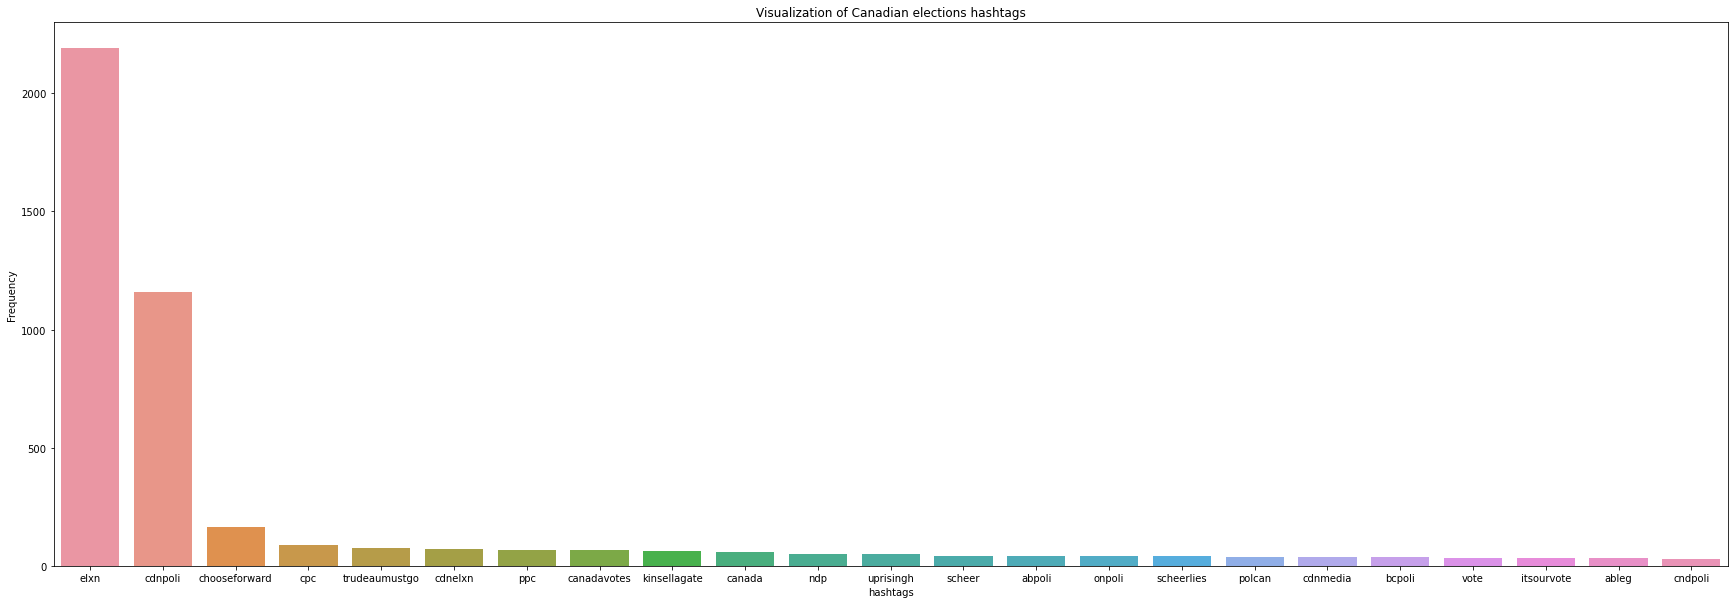

In [21]:
plt.figure(figsize=(30,10))
sns.barplot(data=hashtags_array, x= "hashtags", y = "Frequency").set_title('Visualization of Canadian elections hashtags')
plt.show()

Negtive and positive sentiment visualization of Canadian elections hashtags

In [22]:
# splite the Canadian elections dataset to negative and positive
P_elections_clean= elections_clean[elections_clean["sentiment"] == 'positive']
N_elections_clean= elections_clean[elections_clean["sentiment"] == 'negative']

In [23]:
P_elections_clean = remove_punctuations_hashtag(P_elections_clean)
N_elections_clean = remove_punctuations_hashtag(N_elections_clean)

In [24]:
top_N = 20
P_elections_sent = P_elections_clean['text'].str.cat(sep=' ')
P_words = nltk.tokenize.word_tokenize(P_elections_sent)
P_words_selected = [i for i in P_words if len(i) > 2]
P_words_dist = nltk.FreqDist(P_words_selected)
P_words_fre = pd.DataFrame(P_words_dist.most_common(top_N),
                    columns=['Positive_Word', 'Positive_Frequency'])

P_words_fre

,Positive_Word,Positive_Frequency
0,elxn,1152
1,cdnpoli,557
2,vote,207
3,election,154
4,canada,125
5,chooseforward,111
6,monday,110
7,ndp,82
8,party,73
9,scheer,70


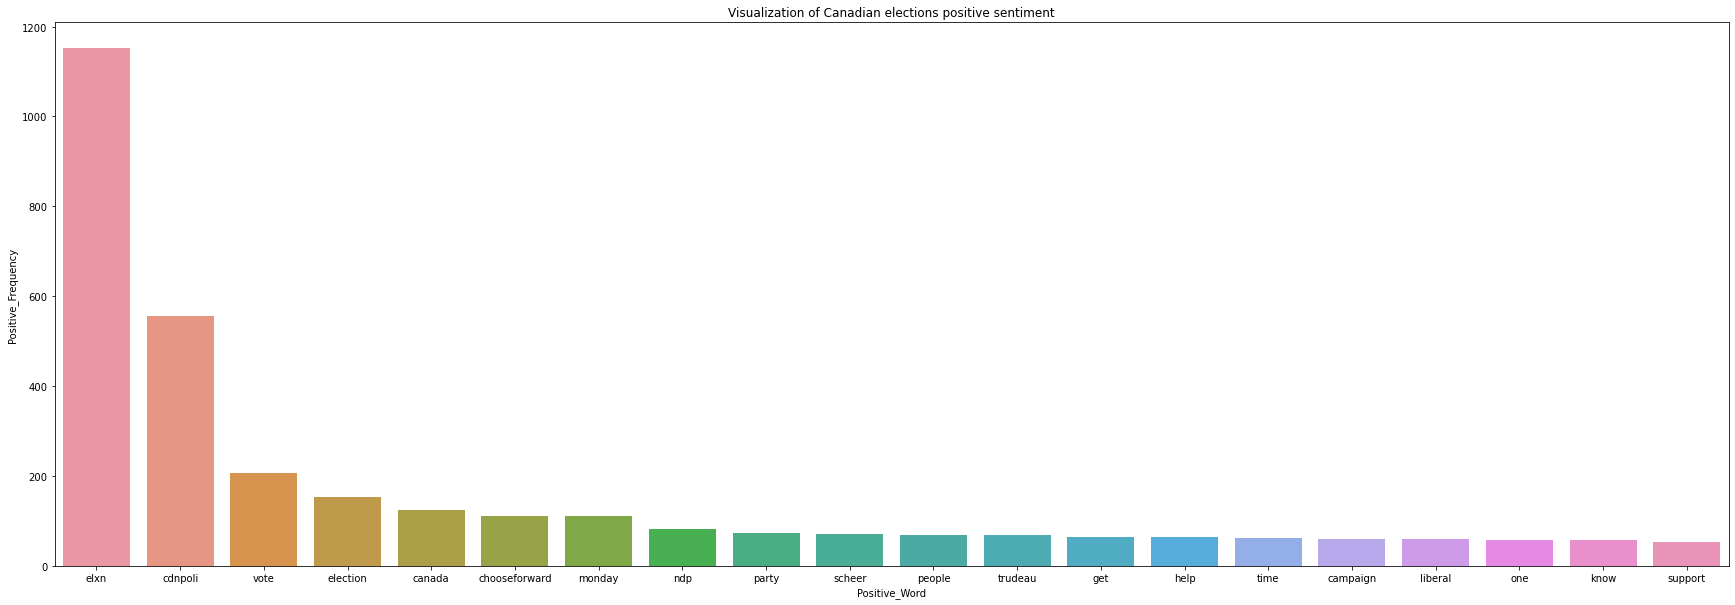

In [25]:
plt.figure(figsize=(30,10))
sns.barplot(data=P_words_fre, x= 'Positive_Word', y = 'Positive_Frequency').set_title('Visualization of Canadian elections positive sentiment')
plt.show()

In [26]:
top_N = 20
N_elections_sent = N_elections_clean['text'].str.cat(sep=' ')
N_words = nltk.tokenize.word_tokenize(N_elections_sent)
N_words_selected = [i for i in N_words if len(i) > 2]
N_words_dist = nltk.FreqDist(N_words_selected)
N_words_fre = pd.DataFrame(N_words_dist.most_common(top_N),
                    columns=['Negative_Word', 'Negative_Frequency'])

N_words_fre

,Negative_Word,Negative_Frequency
0,elxn,1043
1,cdnpoli,602
2,scheer,161
3,trudeau,128
4,canada,124
5,party,112
6,cpc,111
7,kinsella,94
8,like,83
9,vote,80


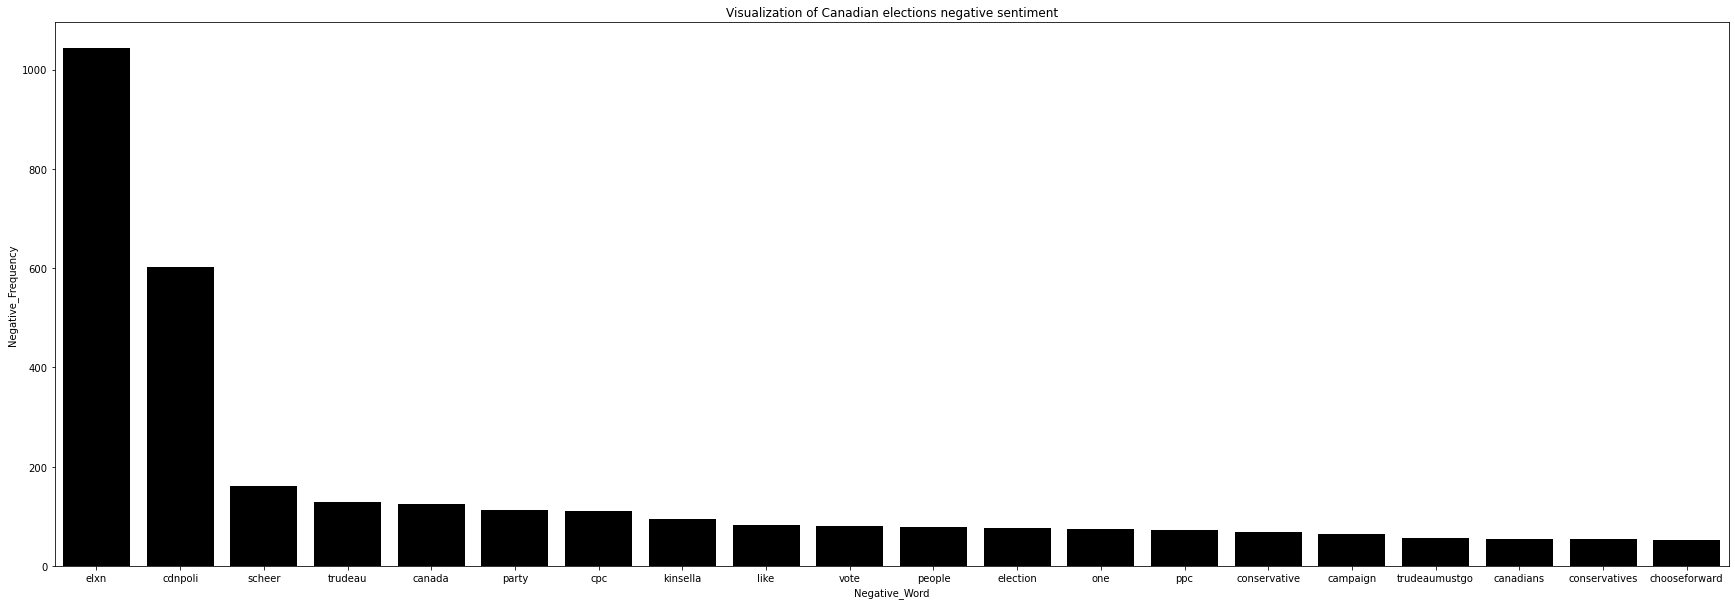

In [27]:
plt.figure(figsize=(30,10))
sns.barplot(data=N_words_fre, x= 'Negative_Word', y = 'Negative_Frequency', color = 'black').set_title('Visualization of Canadian elections negative sentiment')
plt.show()

In [28]:
cpc_list = ['cpc', 'scheer', 'andrew', 'andrew scheer','conservative','conservatives']
liberal_list = ['lpc','trudeau','trudeaumustgo','liberal','justin','justintrudeau','kinsella']
ndp_list = ['ndp','ndc','democratic','jagmeet','singh','jagmeet singh']
cpc = 0
liberal = 0
ndp = 0
for i in P_words:
    if i in cpc_list:
        cpc += 1 
    if i in liberal_list:
        liberal += 1 
    if i in ndp_list:
        ndp += 1        
P_party_dict = {'Frequency of cpc':cpc,'Frequency of liberal':liberal,'Frequency of ndp':ndp}
P_party_df = pd.DataFrame(data = P_party_dict.values(),columns = ['P_score'],index = ['Conservatives','Liberal','New Democratic Party'])

cpc_list = ['cpc', 'scheer', 'andrew', 'andrew scheer','conservative','conservatives']
liberal_list = ['lpc','trudeau','trudeaumustgo','liberal','justin','justintrudeau','kinsella']
ndp_list = ['ndp','ndc','democratic','jagmeet','singh','jagmeet singh']
cpc = 0
liberal = 0
ndp = 0
for y in N_words:
    if y in cpc_list:
        cpc += 1 
    if y in liberal_list:
        liberal += 1 
    if y in ndp_list:
        ndp += 1
N_party_dict = {'Frequency of cpc':cpc,'Frequency of liberal':liberal,'Frequency of ndp':ndp}
N_party_df = pd.DataFrame(data = N_party_dict.values(),columns = ['N_score'],index = ['Conservatives','Liberal','New Democratic Party'])
Party_df = pd.concat([P_party_df, N_party_df], axis=1)
Party_df

,P_score,N_score
Conservatives,206,442
Liberal,210,370
New Democratic Party,112,66


Text(0, 0.5, 'Number of Tweets')

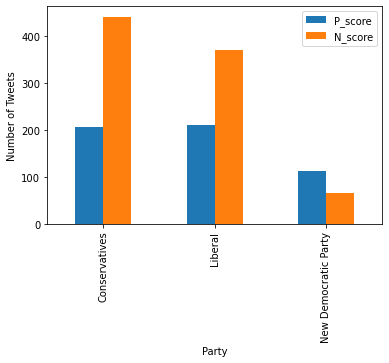

In [29]:
Party_df.plot.bar()
plt.xlabel('Party')  
plt.ylabel('Number of Tweets')

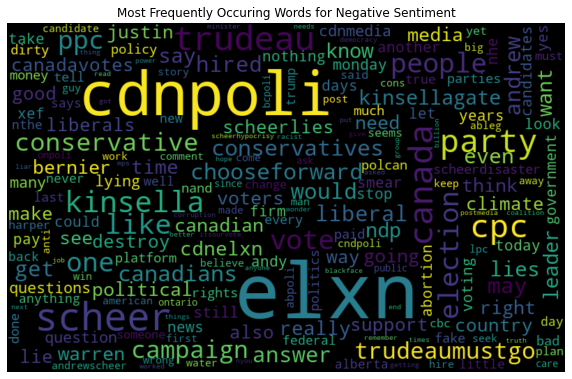

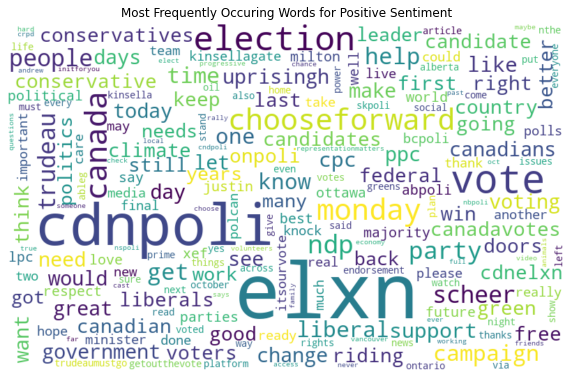

In [30]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(dict(N_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Frequently Occuring Words for Negative Sentiment")
plt.axis('off')
plt.show()
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate_from_frequencies(dict(P_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Frequently Occuring Words for Positive Sentiment")
plt.axis('off')
plt.show()

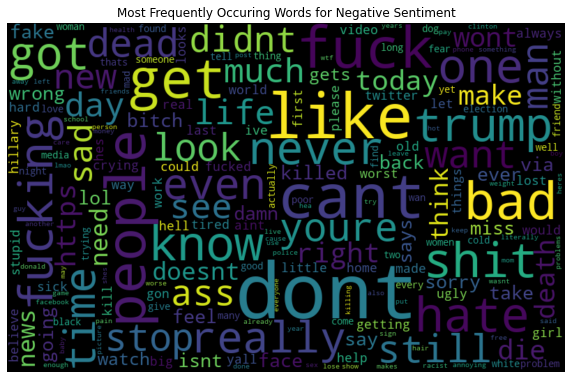

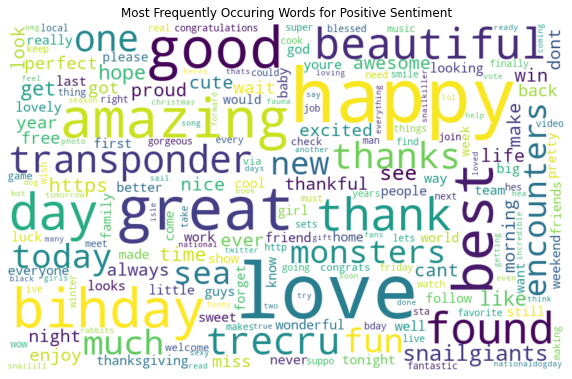

In [31]:
P_tweet_clean = tweet_clean[tweet_clean["label"]==1]
N_tweet_clean = tweet_clean[tweet_clean["label"]==0]
P_tweet_clean = remove_punctuations_hashtag(P_tweet_clean)
N_tweet_clean = remove_punctuations_hashtag(N_tweet_clean)

P_tweet_sent = P_tweet_clean['text'].str.cat(sep=' ')
P_tweet_words = nltk.tokenize.word_tokenize(P_tweet_sent)
P_tweet_words_selected = [i for i in P_tweet_words if len(i) > 2]
P_tweet_words_dist = nltk.FreqDist(P_tweet_words_selected)

N_tweet_sent = N_tweet_clean['text'].str.cat(sep=' ')
N_tweet_words = nltk.tokenize.word_tokenize(N_tweet_sent)
N_tweet_words_selected = [i for i in N_tweet_words if len(i) > 2]
N_tweet_words_dist = nltk.FreqDist(N_tweet_words_selected)

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate_from_frequencies(dict(N_tweet_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Frequently Occuring Words for Negative Sentiment")
plt.axis('off')
plt.show()
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate_from_frequencies(dict(P_tweet_words_dist))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Frequently Occuring Words for Positive Sentiment")
plt.axis('off')
plt.show()

## Question 3: Model preparation

Text feature extraction for genetic tweet dataset

Build the future analyzation data frame through Bag of Words methods (BW):

In [32]:
cv = CountVectorizer(max_features=500)
tweet_bw = cv.fit_transform(tweet_clean['text'])
words = cv.get_feature_names()
weight = tweet_bw.toarray()
tweet_bw_df = pd.DataFrame(weight, columns=words)
tweet_bw_final = pd.concat([tweet_clean,tweet_bw_df],axis=1)
tweet_bw_final

,ID,text,label,absolutely,actually,adorable,ago,aint,album,almost,already,also,always,amazing,america,another,anyone,anything,app,appreciate,around,ass,award,away,awesome,babe,baby,back,bad,bc,bday,beautiful,beauty,believe,best,better,big,bihday,bitch,black,bless,blessed,body,book,boy,boyfriend,boys,brilliant,bro,brother,business,buy,call,came,cant,car,care,case,cat,cause,celebrate,chance,change,check,children,christmas,city,class,click,clinton,coffee,cold,come,coming,congrats,congratulations,cook,cool,could,couldnt,country,couple,crazy,crying,cute,dad,damn,day,days,dead,deal,deals,dear,death,delicious,didnt,die,doesnt,dog,dogs,donald,done,dont,easy,eat,election,encounters,end,enjoy,enjoying,enough,even,evening,event,ever,every,everyone,everything,excited,exciting,eyes,fabulous,face,facebook,faces,fake,fall,family,fan,fans,fantastic,far,fashion,fauna,favorite,fear,feel,feeling,fight,finally,find,first,fit,follow,following,food,football,forever,forget,forward,found,free,friday,friend,friends,fuck,fucked,fucking,full,fun,funny,future,game,games,get,gets,getting,gift,girl,girls,give,giveaway,giving,glad,go,god,going,gonna,good,gorgeous,got,grateful,great,greatest,guy,guys,hair,hand,happy,hard,hate,hea,head,health,healthy,hell,hello,help,heres,hes,hey,hi,high,hillary,holiday,home,honestly,hope,hot,house,ht,htt,http,https,hu,huge,human,id,ill,im,incredible,inspiration,interesting,isle,isnt,ive,job,join,keep,kids,kill,killed,killing,kind,know,last,late,learn,leave,left,let,lets,life,like,lil,list,listen,literally,little,live,...,long,look,looking,looks,lose,lost,lot,lots,love,loved,lovely,loves,loving,luck,lucky,mad,made,make,makes,making,man,many,marketing,may,mean,media,meet,men,meteorite,might,mind,miss,mom,moment,monday,money,monsters,moon,morning,movie,much,music,must,name,national,nationaldogday,necklace,need,never,new,news,next,nice,night,nothing,oh,ok,okay,old,omg,one,online,open,pa,pain,parents,pay,people,perfect,person,phone,photo,photos,pic,pics,picture,pictures,place,play,playing,please,police,poor,porn,post,president,pretty,problem,proud,put,quote,rabbits,read,ready,real,really,reason,red,remember,retweet,right,sad,safe,said,sail,saturday,say,says,school,sea,season,see,seeing,seen,senior,service,set,sets,sex,sexy,share,shes,shit,show,shows,sick,sign,since,sister,site,sleep,smile,snailgiants,snailill,snailkiller,snapchat,social,someone,something,song,soon,sorry,special,sta,staed,star,stay,still,stop,story,students,stunning,stupid,success,summer,sunday,super,suppo,sure,sweet,take,taking,talk,team,tell,thank,thankful,thanks,thanksgiving,thats,theres,theyre,thing,things,think,though,thought,time,times,tips,tired,today,together,tomorrow,tonight,took,top,transponder,travel,trecru,true,trump,try,trying,tweet,twitter,two,ugly,ur,us,use,using,veterans,via,video,view,visit,vote,vs,wait,wanna,want,watch,watching,way,ways,week,weekend,weight,welcome,well,whats,white,whole,win,winter,wish,without,woman,women,wonderful,wont,words,work,working,world,worst,would,wow,wrong,ya,yall,year,years,yes,yesterday,yet,youll,young,youre
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Build the future analyzation data frame through TF-IDF:

In [33]:
tf_idf = TfidfVectorizer(max_features=500)
tweet_tf_idf = tf_idf.fit_transform(tweet_clean['text'])
words_tf_idf = tf_idf.get_feature_names()
weight_tf_idf = tweet_tf_idf.toarray()
tweet_tf_idf_df = pd.DataFrame(weight_tf_idf, columns=words_tf_idf)
tweet_tf_idf_final = pd.concat([tweet_clean,tweet_tf_idf_df],axis=1)
tweet_tf_idf_final

,ID,text,label,absolutely,actually,adorable,ago,aint,album,almost,already,also,always,amazing,america,another,anyone,anything,app,appreciate,around,ass,award,away,awesome,babe,baby,back,bad,bc,bday,beautiful,beauty,believe,best,better,big,bihday,bitch,black,bless,blessed,body,book,boy,boyfriend,boys,brilliant,bro,brother,business,buy,call,came,cant,car,care,case,cat,cause,celebrate,chance,change,check,children,christmas,city,class,click,clinton,coffee,cold,come,coming,congrats,congratulations,cook,cool,could,couldnt,country,couple,crazy,crying,cute,dad,damn,day,days,dead,deal,deals,dear,death,delicious,didnt,die,doesnt,dog,dogs,donald,done,dont,easy,eat,election,encounters,end,enjoy,enjoying,enough,even,evening,event,ever,every,everyone,everything,excited,exciting,eyes,fabulous,face,facebook,faces,fake,fall,family,fan,fans,fantastic,far,fashion,fauna,favorite,fear,feel,feeling,fight,finally,find,first,fit,follow,following,food,football,forever,forget,forward,found,free,friday,friend,friends,fuck,fucked,fucking,full,fun,funny,future,game,games,get,gets,getting,gift,girl,girls,give,giveaway,giving,glad,go,god,going,gonna,good,gorgeous,got,grateful,great,greatest,guy,guys,hair,hand,happy,hard,hate,hea,head,health,healthy,hell,hello,help,heres,hes,hey,hi,high,hillary,holiday,home,honestly,hope,hot,house,ht,htt,http,https,hu,huge,human,id,ill,im,incredible,inspiration,interesting,isle,isnt,ive,job,join,keep,kids,kill,killed,killing,kind,know,last,late,learn,leave,left,let,lets,life,like,lil,list,listen,literally,little,live,...,long,look,looking,looks,lose,lost,lot,lots,love,loved,lovely,loves,loving,luck,lucky,mad,made,make,makes,making,man,many,marketing,may,mean,media,meet,men,meteorite,might,mind,miss,mom,moment,monday,money,monsters,moon,morning,movie,much,music,must,name,national,nationaldogday,necklace,need,never,new,news,next,nice,night,nothing,oh,ok,okay,old,omg,one,online,open,pa,pain,parents,pay,people,perfect,person,phone,photo,photos,pic,pics,picture,pictures,place,play,playing,please,police,poor,porn,post,president,pretty,problem,proud,put,quote,rabbits,read,ready,real,really,reason,red,remember,retweet,right,sad,safe,said,sail,saturday,say,says,school,sea,season,see,seeing,seen,senior,service,set,sets,sex,sexy,share,shes,shit,show,shows,sick,sign,since,sister,site,sleep,smile,snailgiants,snailill,snailkiller,snapchat,social,someone,something,song,soon,sorry,special,sta,staed,star,stay,still,stop,story,students,stunning,stupid,success,summer,sunday,super,suppo,sure,sweet,take,taking,talk,team,tell,thank,thankful,thanks,thanksgiving,thats,theres,theyre,thing,things,think,though,thought,time,times,tips,tired,today,together,tomorrow,tonight,took,top,transponder,travel,trecru,true,trump,try,trying,tweet,twitter,two,ugly,ur,us,use,using,veterans,via,video,view,visit,vote,vs,wait,wanna,want,watch,watching,way,ways,week,weekend,weight,welcome,well,whats,white,whole,win,winter,wish,without,woman,women,wonderful,wont,words,work,working,world,worst,would,wow,wrong,ya,yall,year,years,yes,yesterday,yet,youll,young,youre
0,7.680980e+17,josh jenkins looking forward tab breeders crow...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.512598,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Split the genetic tweets dataset into train and test sets:

In [34]:
# BW
X_bw1_train, X_bw1_test, y_bw1_train, y_bw1_test = train_test_split(tweet_bw_df,tweet_bw_final['label'],test_size=0.3,random_state=10)
X_bw2_train, X_bw2_test, y_bw2_train, y_bw2_test = train_test_split(X_bw1_train,y_bw1_train,test_size=0.3,random_state=10)

In [35]:
#TF-IDF
X_tf1_train, X_tf1_test, y_tf1_train, y_tf1_test = train_test_split(tweet_tf_idf_df,tweet_tf_idf_final['label'],test_size=0.3,random_state=10)
X_tf2_train, X_tf2_test, y_tf2_train, y_tf2_test = train_test_split(X_tf1_train,y_tf1_train,test_size=0.3,random_state=10)

In [36]:
elections_clean_nohash = remove_punctuations_hashtag(elections_clean)

cv = CountVectorizer(max_features=500)
elections_bw = cv.fit_transform(elections_clean_nohash['text'])
elections_words = cv.get_feature_names()
elections_weight = elections_bw.toarray()
elections_bw_df = pd.DataFrame(elections_weight, columns=elections_words)
elections_bw_final = pd.concat([elections_clean_nohash,elections_bw_df],axis=1)

tf_idf = TfidfVectorizer(max_features=500)
elections_tf_idf = tf_idf.fit_transform(elections_clean_nohash['text'])
elections_words_tf_idf = tf_idf.get_feature_names()
elections_weight_tf_idf = elections_tf_idf.toarray()
elections_tf_idf_df = pd.DataFrame(elections_weight_tf_idf, columns=elections_words_tf_idf)
elections_tf_idf_final = pd.concat([elections_clean_nohash,elections_tf_idf_df],axis=1)

Try logistic regression:

In [40]:
from sklearn.linear_model import LogisticRegression
# for bag of words 
log_bw = LogisticRegression()
log_bw.fit(X_bw2_train, y_bw2_train)

LogisticRegression()

In [41]:
print("Training accuracy of bw genetic:", log_bw.score(X_bw2_train, y_bw2_train))
print("Validation accuracy of bw genetic:", log_bw.score(X_bw2_test, y_bw2_test))
print("Testing accuracy of bw genetic:", log_bw.score(X_bw1_test, y_bw1_test))

Training accuracy of bw genetic: 0.9180395341335084
Validation accuracy of bw genetic: 0.9172448997248707
Testing accuracy of bw genetic: 0.916502137865042


In [42]:
# for TF-IDF 
log_tf = LogisticRegression()
log_tf.fit(X_tf2_train, y_tf2_train)
print("Training accuracy of tf genetic:", log_tf.score(X_tf2_train, y_tf2_train))
print("Validation accuracy of tf genetic:", log_tf.score(X_tf2_test, y_tf2_test))
print("Testing accuracy of tf genetic:", log_tf.score(X_tf1_test, y_tf1_test))

Training accuracy of tf genetic: 0.9170309724833235
Validation accuracy of tf genetic: 0.915938467927532
Testing accuracy of tf genetic: 0.9155028525054809


Try KNN:

In [43]:
from sklearn.neighbors import KNeighborsClassifier

k =100

print("For k is 100:")
# for bag of words    
classifier_bw = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
classifier_bw.fit(X_bw2_train, y_bw2_train)
predicted_bw = classifier_bw.predict(X_bw1_test[:10000])

print("Training accuracy of bw genetic:", classifier_bw.score(X_bw2_train[:10000], y_bw2_train[:10000]))
print("Validation accuracy of bw genetic:", classifier_bw.score(X_bw2_test[:10000], y_bw2_test[:10000]))
print("Testing accuracy of bw genetic:", classifier_bw.score(X_bw1_test[:10000], y_bw1_test[:10000]))
print(classification_report(y_bw1_test[:10000],predicted_bw))    
# for TF-IDF     
classifier_tf = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
classifier_tf.fit(X_tf2_train, y_tf2_train)
predicted_tf = classifier_tf.predict(X_tf1_test[:10000])

print("Training accuracy of tf genetic:", classifier_tf.score(X_tf2_train[:10000], y_tf2_train[:10000]))
print("Validation accuracy of tf genetic:", classifier_tf.score(X_tf2_test[:10000], y_tf2_test[:10000]))
print("Testing accuracy of tf genetic:", classifier_tf.score(X_tf1_test[:10000], y_tf1_test[:10000]))
print(classification_report(y_tf1_test[:10000],predicted_tf))    


For k is 100:
Training accuracy of bw genetic: 0.8905
Validation accuracy of bw genetic: 0.8888
Testing accuracy of bw genetic: 0.8887
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      3214
           1       0.98      0.86      0.91      6786

    accuracy                           0.89     10000
   macro avg       0.87      0.91      0.88     10000
weighted avg       0.91      0.89      0.89     10000

Training accuracy of tf genetic: 0.8318
Validation accuracy of tf genetic: 0.8277
Testing accuracy of tf genetic: 0.8229
              precision    recall  f1-score   support

           0       0.67      0.87      0.76      3214
           1       0.93      0.80      0.86      6786

    accuracy                           0.82     10000
   macro avg       0.80      0.83      0.81     10000
weighted avg       0.85      0.82      0.83     10000



Try Naive Bayes:

In [44]:
from sklearn.naive_bayes import MultinomialNB
# for bag of words
NB_bw = MultinomialNB()
NB_bw.fit(X_bw2_train, y_bw2_train)
predicted_NB_bw = NB_bw.predict(X_bw1_test)

print("Training accuracy of bw genetic:", NB_bw.score(X_bw2_train, y_bw2_train))
print("Validation accuracy of bw genetic:", NB_bw.score(X_bw2_test, y_bw2_test))
print("Testing accuracy of bw genetic:", NB_bw.score(X_bw1_test, y_bw1_test))
print(classification_report(y_bw1_test,predicted_NB_bw)) 

Training accuracy of bw genetic: 0.8715418757021925
Validation accuracy of bw genetic: 0.8707843781903757
Testing accuracy of bw genetic: 0.8706682493731756
              precision    recall  f1-score   support

           0       0.86      0.72      0.78     53526
           1       0.87      0.94      0.91    111592

    accuracy                           0.87    165118
   macro avg       0.87      0.83      0.85    165118
weighted avg       0.87      0.87      0.87    165118



In [45]:
# for TF-IDF
NB_tf = MultinomialNB()
NB_tf.fit(X_tf2_train, y_tf2_train)
predicted_NB_tf = NB_tf.predict(X_tf1_test)

print("Training accuracy of tf genetic:", NB_tf.score(X_tf2_train, y_tf2_train))
print("Validation accuracy of tf genetic:", NB_tf.score(X_tf2_test, y_tf2_test))
print("Testing accuracy of tf genetic:", NB_tf.score(X_tf1_test, y_tf1_test))
print(classification_report(y_tf1_test,predicted_NB_tf)) 

Training accuracy of tf genetic: 0.8668327827031677
Validation accuracy of tf genetic: 0.8656365177968888
Testing accuracy of tf genetic: 0.8668285710824986
              precision    recall  f1-score   support

           0       0.90      0.66      0.76     53526
           1       0.86      0.96      0.91    111592

    accuracy                           0.87    165118
   macro avg       0.88      0.81      0.84    165118
weighted avg       0.87      0.87      0.86    165118



Try SVM:

In [46]:
from sklearn.svm import SVC
# for bag of words
svc_bw = SVC(kernel='linear', random_state=0, max_iter=500)
svc_bw.fit(X_bw2_train, y_bw2_train)
predicted_svc_bw = svc_bw.predict(X_bw1_test)
print("Training accuracy of bw genetic:", svc_bw.score(X_bw2_train, y_bw2_train))
print("Validation accuracy of bw genetic:", svc_bw.score(X_bw2_test, y_bw2_test))
print("Testing accuracy of bw genetic:", svc_bw.score(X_bw1_test, y_bw1_test))
print(classification_report(y_bw1_test,predicted_svc_bw)) 

Training accuracy of bw genetic: 0.665513495073992
Validation accuracy of bw genetic: 0.6635202713225242
Testing accuracy of bw genetic: 0.6663355903051151
              precision    recall  f1-score   support

           0       0.45      0.14      0.21     53526
           1       0.69      0.92      0.79    111592

    accuracy                           0.67    165118
   macro avg       0.57      0.53      0.50    165118
weighted avg       0.61      0.67      0.60    165118



In [47]:
# for TF-IDF
svc_tf = SVC(kernel='linear', random_state=0, max_iter=500)
svc_tf.fit(X_tf2_train, y_tf2_train)
predicted_svc_tf = svc_tf.predict(X_tf1_test)
print("Training accuracy of tf genetic:", svc_tf.score(X_tf2_train, y_tf2_train))
print("Validation accuracy of tf genetic:", svc_tf.score(X_tf2_test, y_tf2_test))
print("Testing accuracy of tf genetic:", svc_tf.score(X_tf1_test, y_tf1_test))
print(classification_report(y_tf1_test,predicted_svc_tf)) 

Training accuracy of tf genetic: 0.7034383794787368
Validation accuracy of tf genetic: 0.7037254935889672
Testing accuracy of tf genetic: 0.7039390011991424
              precision    recall  f1-score   support

           0       0.58      0.31      0.41     53526
           1       0.73      0.89      0.80    111592

    accuracy                           0.70    165118
   macro avg       0.66      0.60      0.60    165118
weighted avg       0.68      0.70      0.67    165118



Try Decision Trees:

In [48]:
from sklearn.tree import DecisionTreeClassifier
# for bag of words
dt_bw = DecisionTreeClassifier()
dt_bw.fit(X_bw2_train, y_bw2_train)
predicted_dt_bw = dt_bw.predict(X_bw1_test)
print("Training accuracy of bw genetic:", dt_bw.score(X_bw2_train, y_bw2_train))
print("Validation accuracy of bw genetic:", dt_bw.score(X_bw2_test, y_bw2_test))
print("Testing accuracy of bw genetic:", dt_bw.score(X_bw1_test, y_bw1_test))
print(classification_report(y_bw1_test,predicted_dt_bw)) 

Training accuracy of bw genetic: 0.9630243500895469
Validation accuracy of bw genetic: 0.9089131525670087
Testing accuracy of bw genetic: 0.9090226383556003
              precision    recall  f1-score   support

           0       0.83      0.90      0.87     53526
           1       0.95      0.91      0.93    111592

    accuracy                           0.91    165118
   macro avg       0.89      0.91      0.90    165118
weighted avg       0.91      0.91      0.91    165118



In [49]:
# for TF-IDF
dt_tf = DecisionTreeClassifier()
dt_tf.fit(X_tf2_train, y_tf2_train)
predicted_dt_tf = dt_tf.predict(X_tf1_test)
print("Training accuracy of tf genetic:", dt_tf.score(X_tf2_train, y_tf2_train))
print("Validation accuracy of tf genetic:", dt_tf.score(X_tf2_test, y_tf2_test))
print("Testing accuracy of tf genetic:", dt_tf.score(X_tf1_test, y_tf1_test))
print(classification_report(y_tf1_test,predicted_dt_tf)) 

Training accuracy of tf genetic: 0.9627647937825141
Validation accuracy of tf genetic: 0.9104445328857435
Testing accuracy of tf genetic: 0.9098160103683426
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     53526
           1       0.95      0.92      0.93    111592

    accuracy                           0.91    165118
   macro avg       0.89      0.91      0.90    165118
weighted avg       0.91      0.91      0.91    165118



Try Random Forest:

In [50]:
from sklearn.ensemble import RandomForestClassifier
# for bag of words
rf_bw = RandomForestClassifier(max_depth=None, n_estimators=100)
rf_bw.fit(X_bw2_train, y_bw2_train)
predicted_rf_bw = rf_bw.predict(X_bw1_test)
print("Training accuracy of bw genetic:", rf_bw.score(X_bw2_train, y_bw2_train))
print("Validation accuracy of bw genetic:", rf_bw.score(X_bw2_test, y_bw2_test))
print("Testing accuracy of bw genetic:", rf_bw.score(X_bw1_test, y_bw1_test))
print(classification_report(y_bw1_test,predicted_rf_bw)) 

Training accuracy of bw genetic: 0.9630132262478169
Validation accuracy of bw genetic: 0.9190444878960392
Testing accuracy of bw genetic: 0.9192274615729357
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     53526
           1       0.96      0.92      0.94    111592

    accuracy                           0.92    165118
   macro avg       0.90      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118



In [51]:
# for TF-IDF
rf_tf = RandomForestClassifier(max_depth=None, n_estimators=100)
rf_tf.fit(X_tf2_train, y_tf2_train)
predicted_rf_tf = rf_tf.predict(X_tf1_test)
print("Training accuracy of tf genetic:", rf_tf.score(X_tf2_train, y_tf2_train))
print("Validation accuracy of tf genetic:", rf_tf.score(X_tf2_test, y_tf2_test))
print("Testing accuracy of tf genetic:", rf_tf.score(X_tf1_test, y_tf1_test))
print(classification_report(y_tf1_test,predicted_rf_tf)) 

Training accuracy of tf genetic: 0.9627573778880274
Validation accuracy of tf genetic: 0.9217265664203769
Testing accuracy of tf genetic: 0.9217832095834494
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     53526
           1       0.96      0.93      0.94    111592

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118



Try XGBoost:

In [52]:
from xgboost import XGBClassifier
# for bag of words
xgb_bw = XGBClassifier()
xgb_bw.fit(X_bw2_train, y_bw2_train)
predicted_xgb_bw = xgb_bw.predict(X_bw1_test)
print("Training accuracy of bw genetic:", xgb_bw.score(X_bw2_train, y_bw2_train))
print("Validation accuracy of bw genetic:", xgb_bw.score(X_bw2_test, y_bw2_test))
print("Testing accuracy of bw genetic:", xgb_bw.score(X_bw1_test, y_bw1_test))
print(classification_report(y_bw1_test,predicted_xgb_bw)) 

[22:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy of bw genetic: 0.9114542198293603
Validation accuracy of bw genetic: 0.9090861898911595
Testing accuracy of bw genetic: 0.9096343221211497
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     53526
           1       0.97      0.89      0.93    111592

    accuracy                           0.91    165118
   macro avg       0.89      0.92      0.90    165118
weighted avg       0.92      0.91      0.91    165118



In [53]:
# for TF-IDF
xgb_tf = XGBClassifier()
xgb_tf.fit(X_tf2_train, y_tf2_train)
predicted_xgb_tf = xgb_tf.predict(X_tf1_test)
print("Training accuracy of tf genetic:", xgb_tf.score(X_tf2_train, y_tf2_train))
print("Validation accuracy of tf genetic:", xgb_tf.score(X_tf2_test, y_tf2_test))
print("Testing accuracy of tf genetic:", xgb_tf.score(X_tf1_test, y_tf1_test))
print(classification_report(y_tf1_test,predicted_xgb_tf)) 

[22:08:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training accuracy of tf genetic: 0.9119659165489393
Validation accuracy of tf genetic: 0.9088785451021786
Testing accuracy of tf genetic: 0.9093617897503603
              precision    recall  f1-score   support

           0       0.80      0.95      0.87     53526
           1       0.98      0.89      0.93    111592

    accuracy                           0.91    165118
   macro avg       0.89      0.92      0.90    165118
weighted avg       0.92      0.91      0.91    165118



## Question 4: Model implementation and tuning

Based on the 14 models applied in genetic tweet data, the best model with highest testing accuracy is Random Forest model with TF-IDF

use cross validation and hyperparameter tunning to select the best model

In [54]:
rf_tf = RandomForestClassifier()
rf_tf.fit(X_tf2_train, y_tf2_train)
predicted_rf_tf = rf_tf.predict(X_tf1_test)
print("Training accuracy of tf genetic:", rf_tf.score(X_tf2_train, y_tf2_train))
print("Validation accuracy of tf genetic:", rf_tf.score(X_tf2_test, y_tf2_test))
print("Testing accuracy of tf genetic:", rf_tf.score(X_tf1_test, y_tf1_test))
print(classification_report(y_tf1_test,predicted_rf_tf)) 

Training accuracy of tf genetic: 0.9627462540462974
Validation accuracy of tf genetic: 0.9219255593431503
Testing accuracy of tf genetic: 0.9218013784081687
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     53526
           1       0.96      0.93      0.94    111592

    accuracy                           0.92    165118
   macro avg       0.91      0.92      0.91    165118
weighted avg       0.92      0.92      0.92    165118



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_tf2_train, y_tf2_train)

predicted_rf_random= rf_random.predict(X_tf1_test)
print("Training accuracy of tf genetic:", rf_random.score(X_tf2_train, y_tf2_train))
print("Validation accuracy of tf genetic:", rf_random.score(X_tf2_test, y_tf2_test))
print("Testing accuracy of tf genetic:", rf_random.score(X_tf1_test, y_tf1_test))
print(classification_report(y_tf1_test,predicted_rf_random))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
